# Noise generation

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import *
from scipy.fftpack import *
import sys

In [79]:
def gen_fs():
    return 1/linspace(1, length/2+1, length/2)

def gen_distrs_uni():
    distrs = []
    for f in fs:
        distrs.append(np.random.uniform(-sqrt(f), sqrt(f), N_samples))
    return array(distrs)

def add_spectrum(distr, disp):
    spec_r1 = distr+sqrt(fs - disp) # E[uni^2] = 1/3
    spec_r = np.concatenate((spec_r1, array([0]), spec_r1[::-1][:-1]))
    spec_i1 = 1j*(distr+sqrt(fs - disp)) # E[uni^2] = 1/3)
    spec_i = np.concatenate((spec_i1, array([0]), -spec_i1[::-1][:-1]))
    spec_i[0]=0
    return spec_i+spec_r

def mul_spectrum():
    spec_r1 = (np.random.normal(size=length/2))*sqrt(fs)
    spec_r = np.concatenate((spec_r1, array([0]), spec_r1[::-1][:-1]))
    spec_i1 = 1j*((np.random.normal(size=length/2))*sqrt(fs)) # E[uni^2] = 1/3)
    spec_i = np.concatenate((spec_i1, array([0]), -spec_i1[::-1][:-1]))
    spec_i[0]=0
    return spec_i+spec_r
                  
spectrum = mul_spectrum

In [116]:
length = 1e4
fs = gen_fs()
N_samples = 1e4
distrs = gen_distrs_uni()

In [117]:
spectrum_mean_power = zeros(length)
for i in linspace(0, N_samples-1, N_samples):
    spectrum_mean_power += abs(spectrum())**2

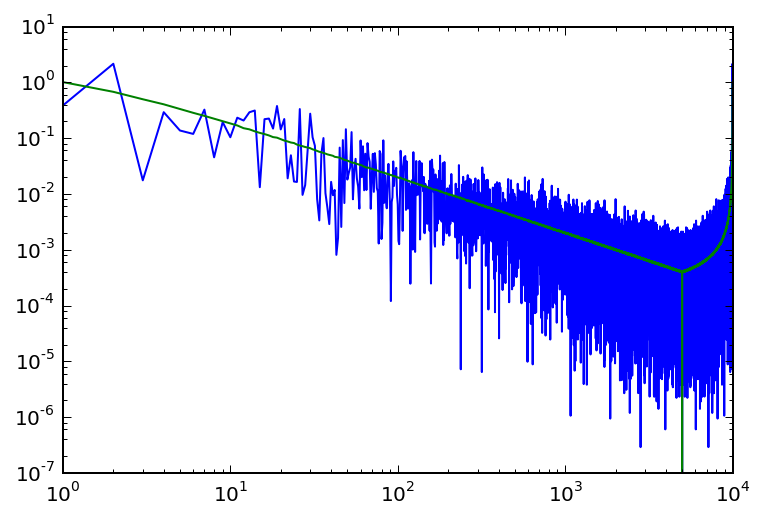

In [118]:
plt.plot(abs(spectrum())**2)
plt.plot(spectrum_mean_power/N_samples)
plt.yscale("log")
plt.xscale("log")

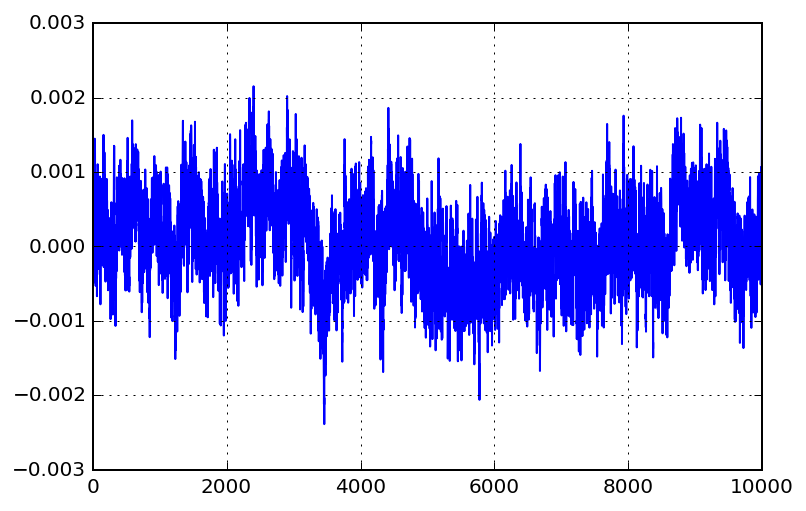

In [127]:
length = 1e4
#fs = gen_fs()
spec = spectrum()
plt.plot(ifft(spec))
plt.grid()

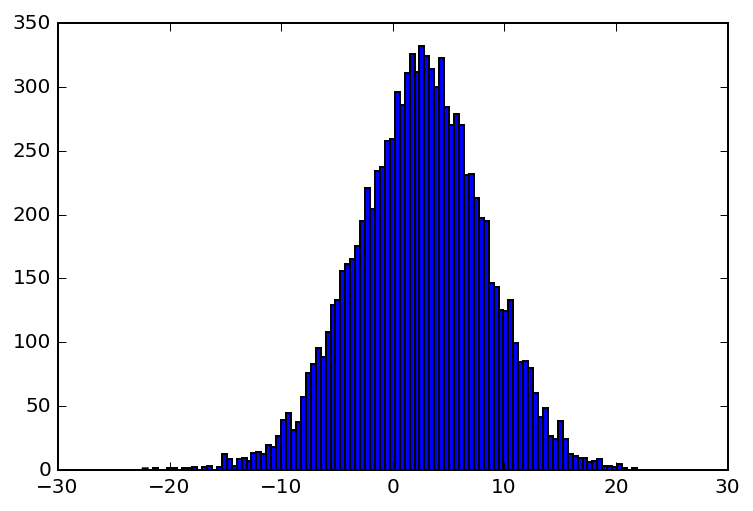

In [138]:
plt.hist(real(ifft(spectrum())*1e4), 100);

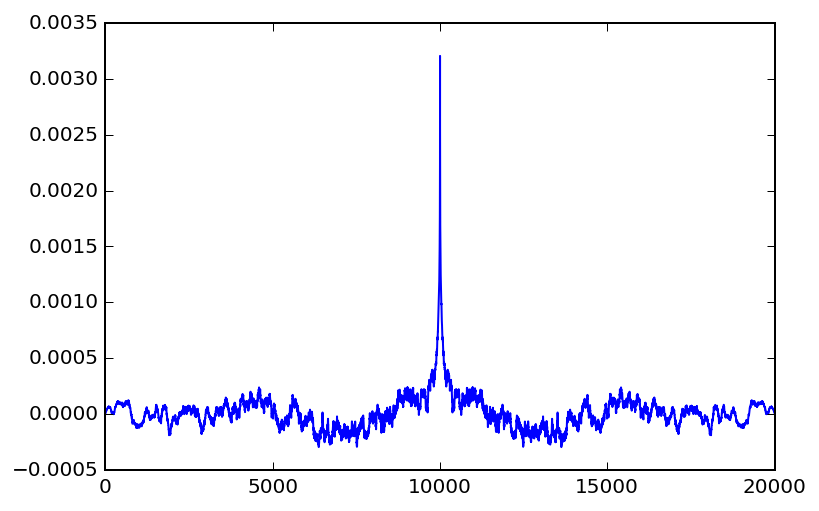

In [141]:
sig = ifft(spectrum())
plt.plot(correlate(sig, sig, 'full'))

In [142]:
R =  zeros(length)#correlate(signal, signal, "full")
for i in linspace(0, 1e4-1, 1e4):
    signal = ifft(spectrum())
    R += correlate(signal, signal, "full")[:length]
    print("\r%i"%i, end="")
    sys.stdout.flush()

9999

/usr/lib/python3.3/site-packages/IPython/kernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


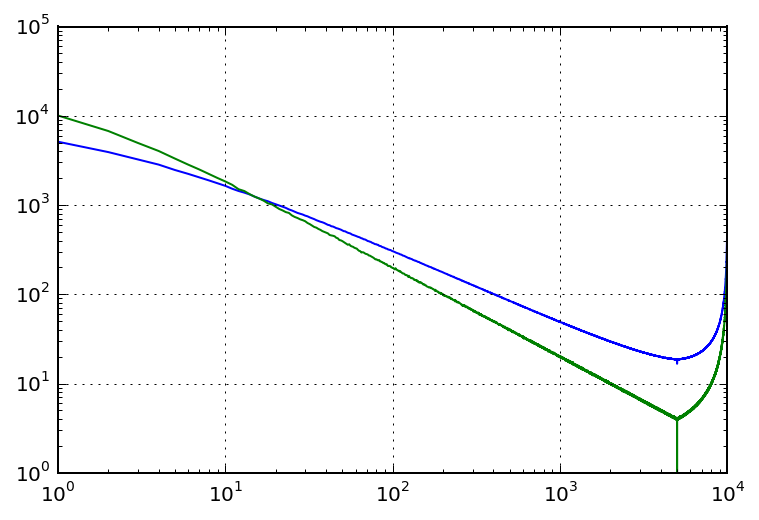

In [143]:
plt.plot(abs(fft(R)))
plt.plot(abs(spectrum_mean_power))
# plt.xscale("log")
plt.yscale("log")
plt.xscale("log")
plt.grid()

##  Test

In [65]:
signals = np.random.uniform( size=(1e4, 1000))

In [66]:
fts = []
for signal in signals:
    fts.append(fft(signal))
fts = array(fts)

In [67]:
fts[0, :].shape

(1000,)

In [68]:
a= []
for ft in fts:
    a.append(correlate(real(ft), real(ft), "full"))
a = array(a)

In [63]:
a.sum(axis=0)

array([  -20795.93152842,  5074794.3003265 ,    11775.48960946, ...,
          11775.48960946,  5074794.3003265 ,   -20795.93152842])

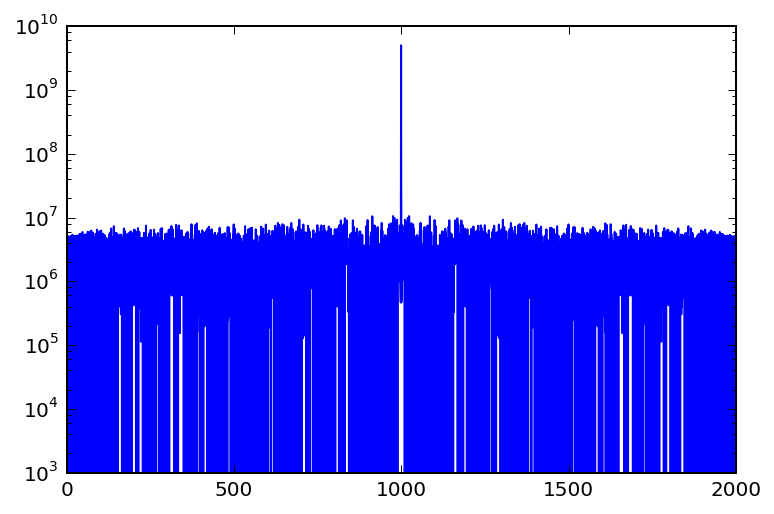

In [64]:
plt.plot(a.sum(axis=0))
plt.yscale("log")

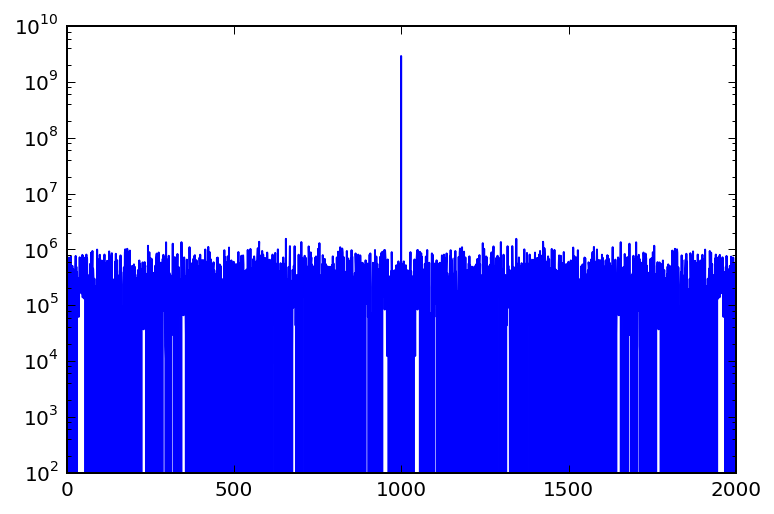

In [69]:
plt.plot(a.sum(axis=0))
plt.yscale("log")

In [33]:
ftfts = []
for signal in fts:
    ftfts.append(fft(signal))
ftfts = array(fts)

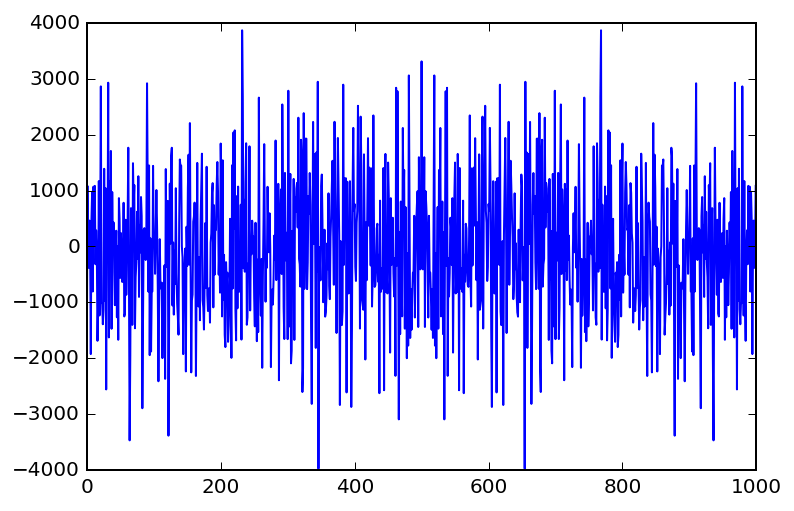

In [35]:
plt.plot(ftfts.sum(axis=0) );

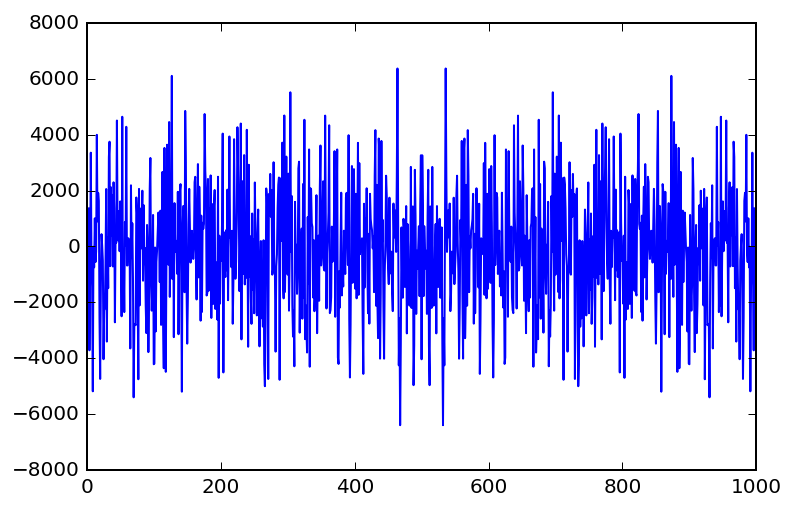

In [24]:
plt.plot(ftfts.sum(axis=0));

In [10]:
fts = []
for signal in signals:
    fts.append(fft(signal))
fts = array(fts)

In [25]:
ftfts.sum(axis=0).shape

(1000,)